In [1]:
# Importing the required libraries

import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [2]:
# Assigning the teams in Dictionary lists to team_type

team_type = {'mens_volleyball' : ['https://ccnyathletics.com/sports/mens-volleyball/roster',
                                  'https://lehmanathletics.com/sports/mens-volleyball/roster?view=1',
                                  'https://www.brooklyncollegeathletics.com/sports/mens-volleyball/roster',
                                  'https://johnjayathletics.com/sports/mens-volleyball/roster?view=1',
                                  'https://athletics.baruch.cuny.edu/sports/mens-volleyball/roster',
                                  'https://mecathletics.com/sports/mens-volleyball/roster',
                                  'https://www.huntercollegeathletics.com/sports/mens-volleyball/roster',
                                  'https://yorkathletics.com/sports/mens-volleyball/roster',
                                  'https://ballstatesports.com/sports/mens-volleyball/roster'],
             'womens_volleyball' : ['https://bmccathletics.com/sports/womens-volleyball/roster',
                                    'https://yorkathletics.com/sports/womens-volleyball/roster',
                                    'https://hostosathletics.com/sports/womens-volleyball/roster',
                                    'https://bronxbroncos.com/sports/womens-volleyball/roster/2021',
                                    'https://queensknights.com/sports/womens-volleyball/roster',
                                    'https://augustajags.com/sports/wvball/roster',
                                    'https://flaglerathletics.com/sports/womens-volleyball/roster',
                                    'https://pacersports.com/sports/womens-volleyball/roster',
                                    'https://www.golhu.com/sports/womens-volleyball/roster'],
             'mens_swimming' : ['https://csidolphins.com/sports/mens-swimming-and-diving/roster',
                                'https://yorkathletics.com/sports/mens-swimming-and-diving/roster',
                                'https://athletics.baruch.cuny.edu/sports/mens-swimming-and-diving/roster',
                                'https://www.brooklyncollegeathletics.com/sports/mens-swimming-and-diving/roster/2022-23',# Using 2022-23 roster as the 2023-24 has over half the roster heights missing
                                'https://lindenwoodlions.com/sports/mens-swimming-and-diving/roster/2022-23',# Using 2022-23 roster as the 2023-24 has over 30% of heights missing
                                'https://mckbearcats.com/sports/mens-swimming-and-diving/roster',
                                'https://ramapoathletics.com/sports/mens-swimming-and-diving/roster',
                                'https://oneontaathletics.com/sports/mens-swimming-and-diving/roster',
                                'https://bubearcats.com/sports/mens-swimming-and-diving/roster/2021-22',
                                'https://albrightathletics.com/sports/mens-swimming-and-diving/roster/2021-22'],
             'womens_swimming' : ['https://csidolphins.com/sports/womens-swimming-and-diving/roster',
                                  'https://queensknights.com/sports/womens-swimming-and-diving/roster',
                                  'https://yorkathletics.com/sports/womens-swimming-and-diving/roster',
                                  'https://athletics.baruch.cuny.edu/sports/womens-swimming-and-diving/roster/2021-22?path=wswim',
                                  'https://www.brooklyncollegeathletics.com/sports/womens-swimming-and-diving/roster/2022-23',# Using 2022-23 roster as the 2023-24 roster only has one height listed
                                  'https://lindenwoodlions.com/sports/womens-swimming-and-diving/roster/2022-23',# Using 2022-23 roster as the 2023-24 roster has 36% of the heights missing
                                  'https://mckbearcats.com/sports/womens-swimming-and-diving/roster',
                                  'https://ramapoathletics.com/sports/womens-swimming-and-diving/roster',
                                  'https://keanathletics.com/sports/womens-swimming-and-diving/roster',
                                  'https://oneontaathletics.com/sports/womens-swimming-and-diving/roster/2022-23'# Using 2022-23 roster as the 2023-24 roster has 30% of the heights missing
                                  ]}

In [3]:
# Function receives a list of urls
def process_heights(list_of_urls):
  # Initializing the heights and names list
  heights = []
  names = []

  # For each url, scrape the data from such
  for url in list_of_urls:

    # Go the server
    page = requests.get(url)

    if page.status_code  == 200:

      #import raw HTML into BeautifulSoup
      soup = BeautifulSoup(page.content, 'html.parser')

      # Extracting all the td tags with a class of height
      rows = soup.find_all('td', class_='height')

      # Going through every single row
      for row in rows:
        # If a '-' is found, append a NaN instead
        if row.get_text() == '-':
          heights.append(np.nan)
        # Otherwise, convert the height to inches and insert that into the list
        else:
          split_heights = row.get_text().split('-')
          feet = float(split_heights[0])
          inches = float(split_heights[1])
          height_in_inches = feet * 12 + inches

          heights.append(height_in_inches)

      name_rows = soup.find_all('td', class_ = 'sidearm-table-player-name')

      for name_row in name_rows:
        names.append(name_row.get_text().strip())

    else:
      print('Website not accessible')

  # Creating a dataframe for Name and Height
  heights_dictionary = {'Name' : names,
                        'Height' : heights
                      }

  heights_df = pd.DataFrame(heights_dictionary)

  # Get the mean of the heights to replace the NaN values
  avg_height= heights_df['Height'].mean()
  # Fill the NaN values with the mean
  heights_df['Height'] = heights_df['Height'].fillna(value= avg_height)

# Return the processed DataFrame containing heights and the average height
  return heights_df, avg_height

In [4]:
# Extract average heights from the returned DataFrames for each team category

mens_volleyball_df, avg_mens_volleyball_height = process_heights(team_type['mens_volleyball'])
womens_volleyball_df, avg_womens_volleyball_height = process_heights(team_type['womens_volleyball'])
mens_swimming_df, avg_mens_swimming_height = process_heights(team_type['mens_swimming'])
womens_swimming_df, avg_womens_swimming_height = process_heights(team_type['womens_swimming'])

In [5]:
# Printing the average height for each game and respective roster

print(f'The average height of the mens volleyball teams is {avg_mens_volleyball_height:.3f}.')
print(f'The average height of the womens volleyball teams is {avg_womens_volleyball_height:.3f}.')
print(f'The average height of the mens swimming teams is {avg_mens_swimming_height:.3f}.')
print(f'The average height of the womens swimming teams is {avg_womens_swimming_height:.3f}.')

The average height of the mens volleyball teams is 72.455.
The average height of the womens volleyball teams is 67.525.
The average height of the mens swimming teams is 71.328.
The average height of the womens swimming teams is 65.817.


In [6]:
# Taking the dataframes and outputting the data as a CSV file
mens_volleyball_df.to_csv("Men's Volleyball DataFrame.csv")
womens_volleyball_df.to_csv("Women's Volleyball DataFrame.csv")
mens_swimming_df.to_csv("Men's Swimming DataFrame.csv")
womens_swimming_df.to_csv("Women's Swimming DataFrame.csv")

In [7]:
def top_and_bottom_n_values(df, column_name, n=5):
    unique_values = df['Height'].unique()
    unique_values.sort()

    top_n_values = unique_values[-n:]
    bottom_n_values = unique_values[:n]

    top_filter_mask = df['Height'].isin(top_n_values)
    bottom_filter_mask = df['Height'].isin(bottom_n_values)

    top_df = df.loc[top_filter_mask]
    bottom_df = df.loc[bottom_filter_mask]

    return top_df, bottom_df

# Top & Bottom for Mens Volleyball Team
top_5, bottom_5 = top_and_bottom_n_values(mens_volleyball_df, 'Height', n=5)
print("Top 5 heights:")
print(top_5)

print("\nBottom 5 heights:")
print(bottom_5)

# Top & Bottom for Womens Volleyball Team
top_5, bottom_5 = top_and_bottom_n_values(womens_volleyball_df, 'Height', n=5)
print("Top 5 heights:")
print(top_5)

print("\nBottom 5 heights:")
print(bottom_5)

# Top & Bottom for Mens Swimming Team
top_5, bottom_5 = top_and_bottom_n_values(mens_swimming_df, 'Height', n=5)
print("Top 5 heights:")
print(top_5)

print("\nBottom 5 heights:")
print(bottom_5)

# Top & Bottom for Womens Swimming Team
top_5, bottom_5 = top_and_bottom_n_values(womens_swimming_df, 'Height', n=5)
print("Top 5 heights:")
print(top_5)

print("\nBottom 5 heights:")
print(bottom_5)

Top 5 heights:
                       Name  Height
34                Jason Lin    77.0
55    Kyle Barriffe-Johnson    79.0
70                Haoxin Hu    77.0
90             Lucas George    77.0
94           Annes Deljanin    79.0
97             Jon Pflueger    78.0
99       Matisse Lee-Maarek    78.0
103         Austinson Cooke    77.0
115     Griffin Satterfield    79.0
116         Trevor Phillips    78.0
117          Vanis Buckholz    78.0
118           Lucas Machado    78.0
119          Rodney Wallace    78.0
121              Ryan Bartz    77.0
122           Marty Canavan    77.0
123               Dyer Ball    78.0
124             Eyal Rawitz    78.0
127   Tinaishe Ndavazocheva    78.0
128  Braydon Savitski-Lynde    79.0
129          Patrick Rogers    79.0
130         Will  Patterson    82.0
131          Mateusz Karpow    81.0
132         Peter  Zurawski    78.0

Bottom 5 heights:
                        Name  Height
2       Edwin Fierros Gaytan    68.0
3               Anirudha Das

In [8]:
# Putting team types into a list
team_type_list = ['Mens Volleyball', 'Womens Volleyball', 'Mens Swimming', 'Womens Swimming']

# Putting average heights into a list
avg_heights_list = [avg_mens_volleyball_height, avg_womens_volleyball_height, avg_mens_swimming_height, avg_womens_swimming_height]

In [9]:
# Creating a dataframe for Team Type & Average Height
df = pd.DataFrame({
                    'Team Type' : team_type_list,
                    'Average Height' : avg_heights_list})

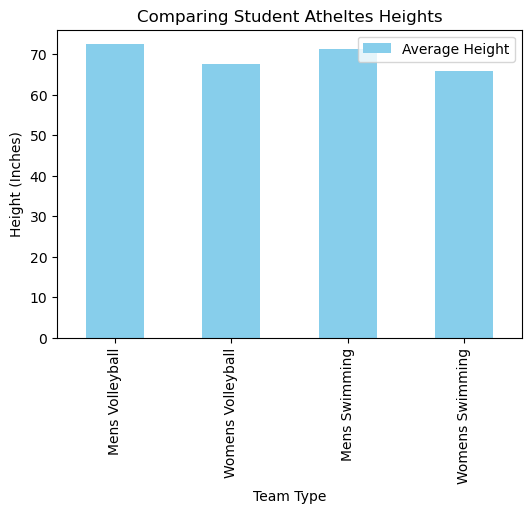

In [10]:
# Used for data visualization
import matplotlib.pyplot as plt
# Setting up the bar graph
df.plot(kind = 'bar', x = 'Team Type', y = 'Average Height', color = 'Skyblue', figsize = (6,4), title = 'Comparing Student Atheltes Heights')
plt.xlabel('Team Type')
plt.ylabel('Height (Inches)')
plt.show()